11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3842 - val_loss: 0.1901
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1795 - val_loss: 0.1517
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1477 - val_loss: 0.1321
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1299 - val_loss: 0.1197
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1188 - val_loss: 0.1113
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1111 - val_loss: 0.1056
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1057 - val_loss: 0.1015
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1018 - val_loss: 0.0986
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0993 - val_loss: 0.0966
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0974 - val_loss: 0.0951
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0962 - val_los

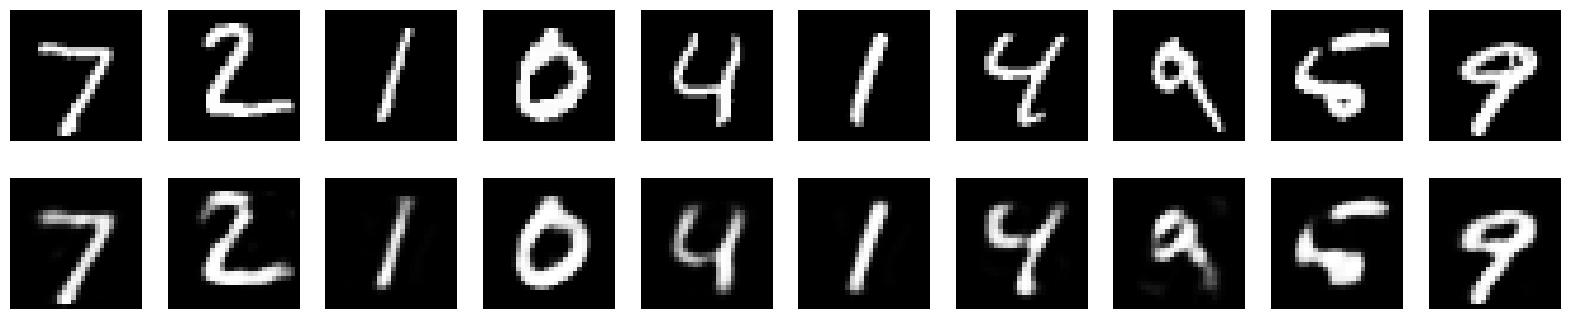

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Define encoder
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)

# Define decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Define autoencoder model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict reconstructed images
reconstructed_imgs = autoencoder.predict(x_test)

# Plot original vs. reconstructed images
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

plot_images(x_test, reconstructed_imgs)
